In [1]:
from classicalOptimisation import branch_and_bound
from MeanAndCovarianceForming import form_optimisation_matricies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [15]:
"""
Forming portfolio data to optimize
"""

stocks = ["AMZN", "PM", "CVX", "PFE", "TSLA", "JPM", "V", "GOOGL", "NFLX", "XOM"]

mean, covariance, constraint_matrix, constraint_vector = form_optimisation_matricies(["AMZN", "PM", "CVX", "PFE", "TSLA", "JPM", "V", "GOOGL", "NFLX", "XOM"], "2022-01-01", '2023-10-01', 0.5, 0.5, 0.5, 0.5, 4.0)

portfolio = branch_and_bound(means=mean, covariance_matrix=covariance, tickers=stocks, object='R')



[*********************100%***********************]  10 of 10 completed


* model Portfolio_Optimization solved with objective = 0.001
*  KPI: ROI      = 0.001
*  KPI: Variance = 0.002


In [26]:
stock_data = {
    'mean': mean,
}

df = pd.DataFrame(stock_data, index=stocks)

# Sort the DataFrame by the 'mean' column in ascending order
df_sorted = df.sort_values(by='mean')

# Display the sorted DataFrame
df_sorted

,mean
PFE,-0.001372
NFLX,-0.000334
TSLA,-0.000330
AMZN,-0.000174
JPM,-0.000091
PM,0.000005
GOOGL,0.000017
V,0.000219
CVX,0.000843
XOM,0.001426


In [16]:
def display_pie(pie_values, pie_labels, colors=None,title=''):
    plt.axis("equal")
    plt.pie(pie_values, labels=pie_labels, colors=colors, autopct="%1.1f%%")
    plt.title(title)
    plt.show()

Portfolio allocation in: AMZN        : 0.00%
Portfolio allocation in: PM          : 0.00%
Portfolio allocation in: CVX         : 0.00%
Portfolio allocation in: PFE         : 0.00%
Portfolio allocation in: TSLA        : 0.00%
Portfolio allocation in: JPM         : 0.00%
Portfolio allocation in: V           : 0.00%
Portfolio allocation in: GOOGL       : 0.00%
Portfolio allocation in: NFLX        : 0.00%
Portfolio allocation in: XOM         : 100.00%


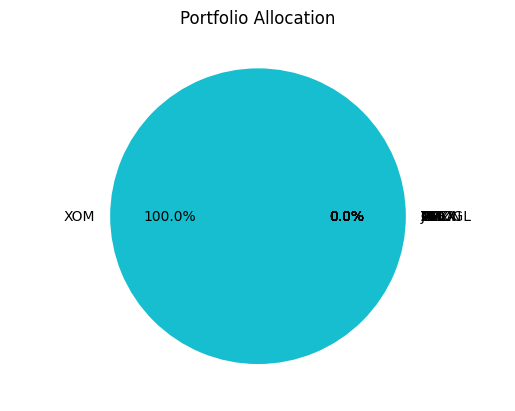

In [17]:
all_fracs = {}
for row in portfolio.itertuples():
    pct = 100 * row.frac.solution_value
    all_fracs[row[0]] = pct
    print('Portfolio allocation in: {0:<12}: {1:.2f}%'.format(row[0], pct))
                
display_pie( list(all_fracs.values()), list(all_fracs),title='Portfolio Allocation')

In [23]:
mean

array([-1.73967845e-04,  5.00296691e-06,  8.43054801e-04, -1.37203100e-03,
       -3.29945387e-04, -9.12441407e-05,  2.19284267e-04,  1.66812606e-05,
       -3.33918770e-04,  1.42597006e-03])